# Computer Simulation of Self Fertilization & Natural Selection
 ## By Haim Elbaz


 ## Problem Presentation
 
 In class we briefly discussed the negative consqeunces of inbreeding in regard to lethal mutations and alleles. Self fertilization ('selfing') is essentially the most extreme form of inbreeding.
 Intuitively, it seems that self fertilization cannot increase the mean fitness of a population. However, self fertilization is relatively abundant in plants, especially in crop & model plants. In these species, some part of the population reproduces by self fertilization as opposed to out-crossing. 
 
 Why was self-fertilization not lost during the evolution of these species? 
 Can it help favoring a genotype that otherwise would not be in favor? What is the relationship between natural selection and self fertilization? 

 ## Model
The model can be seen as constructed from two parts. The first part is the effect of self fertilization on genotype frequencies, and the second is the consideration of fitness in a population that can self-fertilize.

Allele frequencies are not changed by self fertilization, as seen in the following equation, so they are not being taken into account. This is replicable even by including random genetic drift.

$$ p_1 = P_1 + \frac{1}{2} H_1 = (P_0 + \frac{1}{4} H_0) + \frac{1}{4} H_0 = p_0 $$


<u>Genotype Frequencies </u>

Assuming Hardy-Weinberg proportions, the following equations represent the change in genotype frequency in regard to self-fertilization, where <i>S</i> is the proportion of self-fertilization in the population and <i>T</i> is the complementary proportion of out-crossing. 

The alleles and their corresponding frequencies are <i>p</i> & <i>q</i> (<i>p</i> being the dominant allele) and <i>P</i>,<i>Q</i> are their corresponding homozygotes - <i>H</i> being the heterozygote genotype.


$$ P_1 = Tp^2_0 + S(P_0 + \frac{1}{4} H_0) :: (1.a) $$
$$ Q_1 = Tq^2_0 + S(Q_0 + \frac{1}{4} H_0) :: (1.b) $$
$$ H_1 = 2Tp_0 q_0 + \frac{1}{2}S H_0      :: (1.c) $$


<u>Natural Selection </u>

First, the notation being used for natural selection is relative fitness based, using dominance degree and selection coefficient <i>h</i>,<i>s</i> respectively, where <i>P</i> is the relatively fitter allele.

$$ \overline{w}_{P} = 1    :: (2.a) $$ 
$$ \overline{w}_{H} = 1-hs :: (2.b) $$ 
$$ \overline{w}_{Q} = 1-s  :: (2.c) $$ 

Since self-fertilization is a form of inbreeding, it is possible to use the equations for genotype fitness values under inbreeding. Since the inbreeding parameter, <i>f</i>, represends the proportion of inbreeding in the population, and the self-fertilization parameter, <i>S</i>, represents the proportion of self-fertilization, assuming that self-fertilization exists in the population but it is the only form of inbreeding that exists for that population, then we can represent that assumption as  <i>S = f</i>.

Accordingly, the mean fitness under no self-fertilization and under self-fertilization in degree <i>f</i> are: 

$$ \overline{w} = p^2 w_P + 2pqw_H + q^2 w_Q                :: (3.a)$$ 
$$ \overline{w}_{f} = \overline{w} + fpq(w_P -2 w_H + w_Q ) :: (3.b)$$ 

Combining equation sets 2 & 3, the extent in which inbreeding/selfing will reduce the mean fitness - termed as the inbreeding depression, the difference between them is:

$$ \overline{w} - \overline{w}_{f} = sfpq(1-2h):: (4)  $$ 

In [1]:
# Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## The Code
This version of the model is deterministic and shows the average result over infinite repeats, or the result of an infinite population. The is also a randomly-driven version with genetic drift at the end of this notebook.

In [2]:
# ========================================================================== #
# Simulation for self fertilization & natural selection
# ========================================================================== #

def det_self_fertilization_simulation(A1_frequency,A2_dominance_degree,
                                      selection_coefficient,self_fert_factor,
                                      no_of_generations):
    p           = A1_frequency
    h           = A2_dominance_degree
    s           = selection_coefficient
    S           = self_fert_factor
    generations = range(2, no_of_generations)
    
    # Arithmetic parameters
    q = 1-p
    f = S         # Assuming all inbreeding is self fertilization 
    T = 1-S
    
    # Hardy-Weinberg genotype frequencies
    P0 = p**2
    Q0 = q**2
    H0 = 2*p*q
    
    #Creating lists for parameters + H-W check
    df = pd.DataFrame(columns=['p', 'q', 'P', 'Q', 'H', 'hwcheck'])
    df = df.append({ 
        'generation': 0,
        'p': p, 
        'q': q, 
        'P': P0, 
        'Q': Q0, 
        'H': H0,
        'hwcheck': P0+H0+Q0
                }, ignore_index=True)
    
    # Natural selection parameters with regard to self fertilization
    w_11     = 1.0
    w_12     = 1-(h*s)
    w_22     = 1-s
    w_bar    = ((p**2*w_11)+(2*p*q*w_12)+(q**2*w_22))
    w_bar_f  = w_bar + f*p*q*(w_11+w_22-2*w_12)
    
    # Accounting for self fertilization 
    P1 = ((T*p**2+S*(P0+(0.25*H0)))*w_11)/w_bar_f
    Q1 = ((T*q**2+S*(Q0+(0.25*H0)))*w_22)/w_bar_f
    H1 = ((2*T*p*q+0.5*S*H0)*w_12)/w_bar_f
    df = df.append({ 
        'generation': 1,
        'p': p, 
        'q': q, 
        'P': P1, 
        'Q': Q1, 
        'H': H1,
        'hwcheck': P1+H1+Q1
                }, ignore_index=True)
    
    
    # Loop over generations
    for generation in generations:      
        # Creating new genotype frequencies
        # this time they depend on their previous value.
        P1 = ((T*p**2+S*(P1+(0.25*H1)))*w_11)/w_bar_f
        Q1 = ((T*q**2+S*(Q1+(0.25*H1)))*w_22)/w_bar_f
        H1 = ((2*T*p*q+0.5*S*H1)*w_12)/w_bar_f
        checksum = P1+H1+Q1
        P1 = P1/checksum
        Q1 = Q1/checksum
        H1 = H1/checksum
        p  = P1 + 0.5*H1
        q  = 1-p
        df = df.append({ 
        'generation': generation,
        'p': p, 
        'q': q, 
        'P': P1, 
        'Q': Q1, 
        'H': H1,
        'hwcheck': P1+H1+Q1
                }, ignore_index=True)
    return df

def plot_subplot(df, i,j, title, xticks):
  generations = df['generation']
  P = df['P']
  Q = df['Q']
  H = df['H']

  # Plot
  ax[i,j].plot(generations, P, label = 'P homozygote', color = 'blue')
  ax[i,j].plot(generations, Q, label = 'Q homozygote', color = 'red')
  ax[i,j].plot(generations, H, label = 'H Heterozygote', color = 'green')
  ax[i,j].set_title(title , fontdict = {'fontsize': 15, 'fontweight' : 600})
  ax[i,j].set_xlabel('No. of generations' , fontdict = {'fontsize': 10, 'fontweight' : 400})
  ax[i,j].set_ylabel('Genotype Frequency', fontdict = {'fontsize': 10, 'fontweight' : 400})
  ax[i,j].set_ylim([0,1.0])
  ax[i,j].set_xlim([0,len(generations)-1])
  ax[i,j].grid(axis='y', linestyle= '--')
  ax[i,j].grid(axis='x', linestyle= '--')
  ax[i,j].set_xticks(generations[::xticks])
  ax[i,j].legend()
  
def run_and_plot(A1_frequency, A2_dominance_degree, selection_coefficient,
                 self_fert_factor, no_of_generations, i, j, title, xticks):
  df = det_self_fertilization_simulation(A1_frequency, A2_dominance_degree, 
                                         selection_coefficient, self_fert_factor,
                                         no_of_generations)
  plot_subplot(df, i, j, title, xticks)

# subplot grid lists for iteration
ii, jj = [0, 0, 1, 1], [0, 1, 0, 1]

## Results


## Effect of self-fertilization coefficient on genotype frequencies

<u>Total Self-Fertilization</u>

First, lets test the model for the effect of self-fertilization with only and with no natural selection. For this purpuse, we will set the selection coefficient to 0.0 and neutralize the effect of outcrossing by setting the selfing factor to 1.0 (varying p for demonstration).  

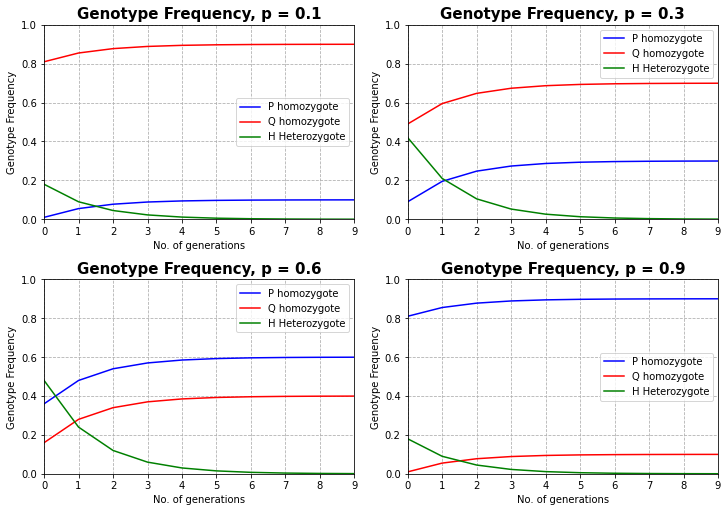

In [3]:
# Selfing only, varying p

fig, ax = plt.subplots(2,2, figsize=(10,7), constrained_layout=True)

plist = [0.1, 0.3, 0.6, 0.9]
for p, i, j in zip(plist, ii, jj):
  run_and_plot(
        A1_frequency = p,
        A2_dominance_degree = 0.0,
        selection_coefficient = 0.0,
        self_fert_factor = 1.0,
        no_of_generations = 10,
        i = i, j = j, xticks = 1,  title = f'Genotype Frequency, p = {p}')

We can see that the proportions of the homozygotes P&Q have risen to the exact extent in which the heterozygote declined. Eventually, they both reach equilibrium where the homozygote frequency exactly equals its respective allele frequency and the heterozygote frequency (asymptotically) reaces 0 (P=p, Q=q, H=0). This decay of heterozygosity happens because on average, in each generation the progeny for a heterozygote offspring from heterozygote selfing is only 0.5 of the previous generation, and the other half of the progeny are homozygotes - 0.25 for each homozygote. Equation for said decay:

$$ H_t = (\frac{1}{2})^t H_0 $$


<u>Partial Self Fertilization</u>


With any degree of partial self-fertilization (S<1.0, testing S = 0.9):

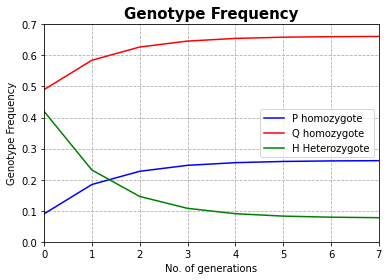

In [4]:
# Recreating figure 8.11 from 'Genetics of Populations' by P.W. Hendrick, p. 460

df = det_self_fertilization_simulation(0.3, 0.0, 0.0, 0.9, 8)

# Plot
fig, ax = plt.subplots()
plt.plot(df['generation'], df['P'], label = 'P homozygote', color = 'blue')
plt.plot(df['generation'], df['Q'], label = 'Q homozygote', color = 'red')
plt.plot(df['generation'], df['H'], label = 'H Heterozygote', color = 'green')
plt.title('Genotype Frequency' , fontdict = {'fontsize': 15, 'fontweight' : 600})
plt.xlabel('No. of generations' , fontdict = {'fontsize': 10, 'fontweight' : 400})
plt.ylabel('Genotype Frequency', fontdict = {'fontsize': 10, 'fontweight' : 400})
ax.set_ylim([0, 0.7])
ax.set_xlim([0, 7])
ax.grid(axis='y', linestyle= '--')
ax.grid(axis='x', linestyle= '--')
ax.set_xticks(df['generation'])
ax.legend()

Heterozygosity is lowered but does not reach zero in equilibrium because some degree of outcrossing (T) exist in the population, in addition to heterozygote population from heterozygote selfing, there is also a heterozygote population resulting from crossing the two homozygotes.

## Effect of selection & dominance on a self-fertilizing population's genotype frequencies

Lets consider the effect of selection and dominance degrees in continuation to the previous example.

<u>Selection</u>


Comparing the results for various degrees of selfing where P is slightly advantageous over Q (s = 0.2) and the heterozygote H is exactly in the middle (h = 0.5):

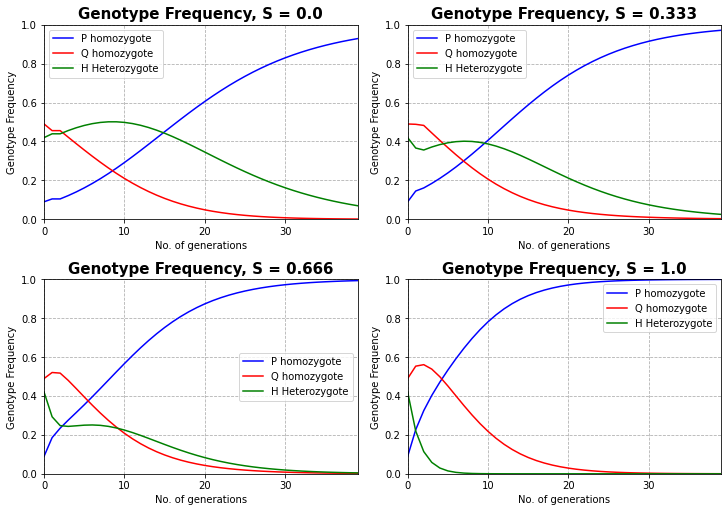

In [5]:
# Varying S

fig, ax = plt.subplots(2,2, figsize=(10,7), constrained_layout=True)

Slist = [0.0, 0.333, 0.666, 1.0]
for S, i, j in zip(Slist, ii, jj):
  run_and_plot(
        A1_frequency = 0.3,
        A2_dominance_degree = 0.5,
        selection_coefficient = 0.2,
        self_fert_factor = S,
        no_of_generations = 40,
        i = i, j = j, xticks = 10,  title = f'Genotype Frequency, S = {S}')

Since the q allele is harmful, it is expected that p will fixate, even that it started as the lower frequency allele and even without selfing. However, we can see that the introduction of selfing into this system have caused fixation to happen earlier (in terms of generations), and also caused the heterozygote population to decline much faster. The more prevalent self-fertilization is, the faster the population fixes and heterozygosity declines.

<u>Partial & Complete Dominance</u>

After seeing the effect of self-fertilization on the heterozygote genotype, it does not seem we can expect any dramatic change in varying degrees of dominance regardless of selection, the heterozygote is expected to asymptotically reach zero. 

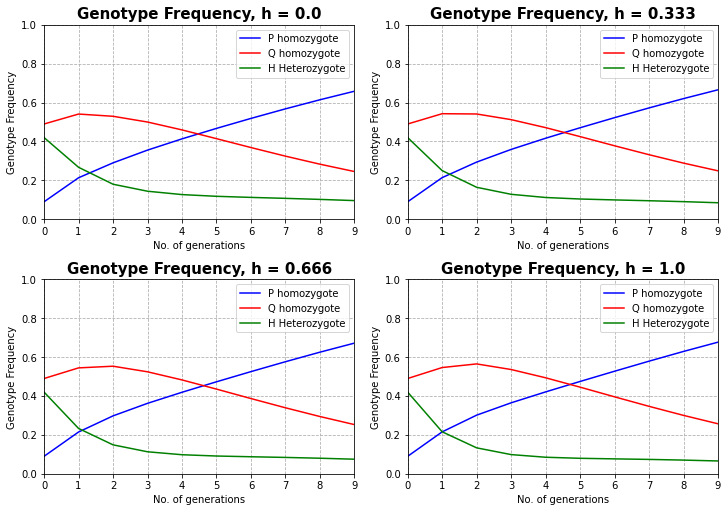

In [6]:
# Partial & complete dominance, 0<=h<=1

fig, ax = plt.subplots(2,2, figsize=(10,7), constrained_layout=True)

hlist = [0.0, 0.333, 0.666, 1.0]
for h, i, j in zip(Slist, ii, jj):
  run_and_plot(
        A1_frequency = 0.3,
        A2_dominance_degree = h,
        selection_coefficient = 0.2,
        self_fert_factor = 0.9,
        no_of_generations = 10,
        i = i, j = j, xticks = 1,  title = f'Genotype Frequency, h = {h}')

as h gets closer to 1, the H genotype decays faster, but the effect is on a very small scale. In all of the above examples the population reaches fixation of P, the small case is for the effect of varying degrees of partial dominance to be noticable. 

This is the case for partial dominance.

However, it is noticable that although H is more fit than Q, due to the high degree of self-fertilization it does not become more prevalent. As we have seen in the previous example, it is not always the case and for lower degree of selfing, H did have a higher frequency than Q, although temporarily. 

<u>Underdominance</u>

H is the least fit, in this case the heterozygote is being lost faster:


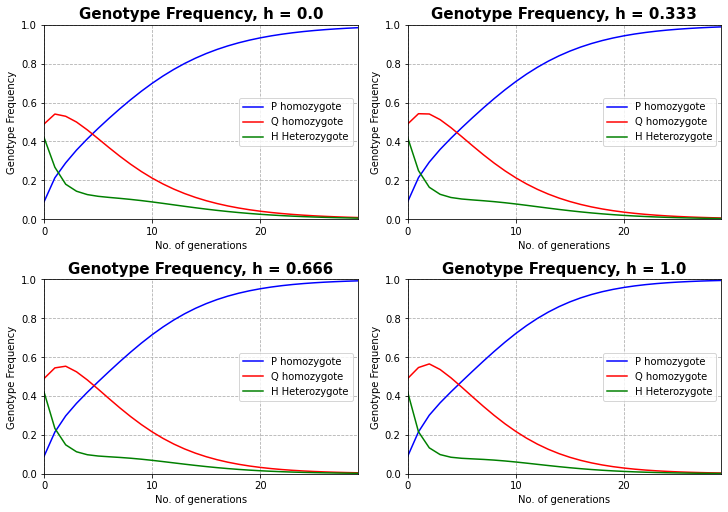

In [7]:
# Underdominance h>0

fig, ax = plt.subplots(2,2, figsize=(10,7), constrained_layout=True)

hlist = [0.0, 1.0, 2.0, 3.0]
for h, i, j in zip(Slist, ii, jj):
  run_and_plot(
        A1_frequency = 0.3,
        A2_dominance_degree = h,
        selection_coefficient = 0.2,
        self_fert_factor = 0.9,
        no_of_generations = 30,
        i = i, j = j, xticks = 10,  title = f'Genotype Frequency, h = {h}')

<u>Overdominance</u>

H the fittest so it is lost more slowly, but still lost due to self fertilization:

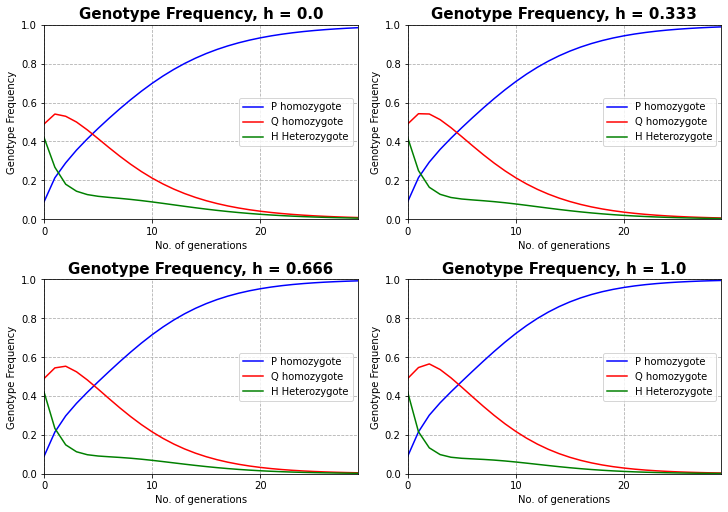

In [8]:
# Overdominance h<0

fig, ax = plt.subplots(2,2, figsize=(10,7), constrained_layout=True)

hlist = [0.0, -0.5, -1.0, -2.0]
for h, i, j in zip(Slist, ii, jj):
  run_and_plot(
        A1_frequency = 0.3,
        A2_dominance_degree = h,
        selection_coefficient = 0.2,
        self_fert_factor = 0.9,
        no_of_generations = 30,
        i = i, j = j, xticks = 10,  title = f'Genotype Frequency, h = {h}')

Considering equations 3.b and 4:

$$ \overline{w}_{f} = \overline{w} + fpq(w_P -2 w_H + w_Q ) :: (3.b)$$ 
$$ \overline{w} - \overline{w}_{f} = sfpq(1-2h):: (4)  $$ 

The parameters s,f,p,q are all relative and are always between 0.0 and 1.0. however, h can be greater than 1.0 and also negative. This possibly means that in cases of underdominance where h is negative, selfing could increase the average fitness of the population.

Relating the fitness values to each other shows: 

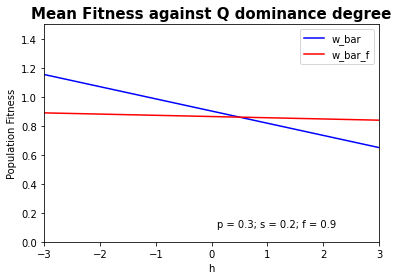

In [9]:
# Plotting w_bar and w_bar_f for h 

# Parameters
p = 0.3
q = 1 - p
s = 0.2
f = 0.9

# Create lists for plot
w_bar_list   = []
w_bar_f_list = []
hh = np.linspace(-3.0, 3.0, 10000)

for h in hh:
    w_11     = 1.0
    w_12     = 1-(h*s)
    w_22     = 1-s
    w_bar   = ((p**2*w_11)+(2*p*q*w_12)+(q**2*w_22))
    w_bar_f = w_bar + f*p*q*(w_11+w_22-2*w_12)
    w_bar_list.append(w_bar)
    w_bar_f_list.append(w_bar_f)

# Plot:
fig, ax = plt.subplots()
plt.plot(hh, w_bar_list,label = 'w_bar', color = 'blue')
plt.plot(hh, w_bar_f_list, label = 'w_bar_f', color = 'red')
plt.title('Mean Fitness against Q dominance degree' , fontdict = {'fontsize': 15, 'fontweight' : 600})
plt.xlabel('h')
plt.ylabel('Population Fitness')
ax.set_ylim([0,1.5])
ax.set_xlim([-3,3])
ax.set_axisbelow(True)
ax.legend()
textbox = f'p = {p}; s = {s}; f = {f}'
ax.text(0.1, 0.1, textbox)
plt.show()


According to the above plot, it seems that 'inbreeding depression' could turn over, and when the heterozygote is the least fit allele, a population with self fertilization is more fit on average than a population with no self fertilization. 


## Summary

One of my original ideas was to check if there was a case in which selfing will help a population in which a less fit allele is the more abundant one. 

According to the model, it seems that self fertilization by itself cannot determine which allele will fix. Without selection, the homozygotes will gradually reach their respective allele frequencies. When selection is introduced, the more fit allele is always the one destined to be fixed ,and in the presense of selfing heterozygosity will always decay. However, selfing could haste fixation & heterozygote decay, which could be dramatically helpful if the genetic drift is very strong (for example, when the population is very small) or if the heterozygote is less fit than both alleles.

The combined effect of both partial self-fertilization and natural selection in a population is strongly dependent on the state of the homozygote and the dominance relations between the alleles. In cases of partial-dominance and under-dominance, fixation of the better allele happens faster, causing an increase in the average fitness of the whole population in comparison to a population without self fertilization, which will have to suffer longer from having a larger amount of less-fit individuals for a longer period of time. In cases of over-dominance, the opposite, 'intuitive' case is true - a population without selfing is more fit.  


I tried implementing genetic drift into the model, but ended up leaving the model with no randomization, giving a consistent result each time, making it easier to discuss and less easy to 'cherry pick' a favorite result. The downside is that population size effect combined with selfing & selection cannot be directly tested with the model as presented above, but can be tested in the 'random' version of the model, presented below. This was done mainly because during testing of many different parameter sets I did not notice any surprising effect of population size on allele/phenotype frequency except the expected faster and slower fixations in smaller and larger populations, respectively. Most of the repeats, in any population size, produces a very similar result to the above 'deterministic' version. Repeats that vary from it are increasing with a smaller population size.

There are several questions that are still open, but can be answered with minor tweaks to the core model. It would be interesting to check what would happen if we correlate the degree of selfing to another parameter. For example, we can set the tested locus to be a gene responsible for selfing itself, where the degree of dominance of the selfing allele is the proportion of selfing in the population (i.e correlate h and S), or make selfing of a certain genotype dependent on its frequency (correlate p/q to S). Also, the model has only 2 alleles for simplicity (there are always 2 parents) but many plants that self pollinate have polyploidity, and might have more than 2 alleles of one locus in their genome. 


## Random-driven, genetic drift version


In [10]:
# ========================================================================== #
# Simulation for self fertilization & natural selection
# ========================================================================== #

def rand_self_fertilization_simulation(A1_frequency,A2_dominance_degree,
                                      selection_coefficient,self_fert_factor,
                                      no_of_generations, population_size):
    p           = A1_frequency
    h           = A2_dominance_degree
    s           = selection_coefficient
    S           = self_fert_factor
    N           = population_size
    generations = range(2, no_of_generations)
    
    # Arithmetic parameters
    q = 1-p
    f = S         # Assuming all inbreeding is self fertilization 
    T = 1-S
    
    # Hardy-Weinberg genotype frequencies
    P0 = p**2
    Q0 = q**2
    H0 = 2*p*q
    
    #Creating lists for parameters + H-W check
    df = pd.DataFrame(columns=['p', 'q', 'P', 'Q', 'H', 'hwcheck'])
    df = df.append({ 
        'generation': 0,
        'p': p, 
        'q': q, 
        'P': P0, 
        'Q': Q0, 
        'H': H0,
        'hwcheck': P0+H0+Q0
                }, ignore_index=True)
    
    # Natural selection parameters with regard to self fertilization
    w_11     = 1.0
    w_12     = 1-(h*s)
    w_22     = 1-s
    w_bar    = ((p**2*w_11)+(2*p*q*w_12)+(q**2*w_22))
    w_bar_f  = w_bar + f*p*q*(w_11+w_22-2*w_12)
    
    # Accounting for self fertilization 
    P1 = ((T*p**2+S*(P0+(0.25*H0)))*w_11)/w_bar_f
    Q1 = ((T*q**2+S*(Q0+(0.25*H0)))*w_22)/w_bar_f
    H1 = ((2*T*p*q+0.5*S*H0)*w_12)/w_bar_f
    df = df.append({ 
        'generation': 1,
        'p': p, 
        'q': q, 
        'P': P1, 
        'Q': Q1, 
        'H': H1,
        'hwcheck': P1+H1+Q1
                }, ignore_index=True)
    
    
    # Loop over generations
    for generation in generations:      
        # Creating new allele frequencies 
        p_copies, q_copies = 0, 0
        for gamete in range(2*N):
          if np.random.random() < p:
                 p_copies += 1
          else:
                 q_copies += 1      
        p = p_copies/(2*N)
        q = q_copies/(2*N)
        
        # Creating new genotype frequencies
        P1 = ((T*p**2+S*(P1+(0.25*H1)))*w_11)/w_bar_f
        Q1 = ((T*q**2+S*(Q1+(0.25*H1)))*w_22)/w_bar_f
        H1 = ((2*T*p*q+0.5*S*H1)*w_12)/w_bar_f
        checksum = P1+H1+Q1
        P1 = P1/checksum
        Q1 = Q1/checksum
        H1 = H1/checksum
        p  = P1 + 0.5*H1
        q  = 1-p

        df = df.append({ 
        'generation': generation,
        'p': p, 
        'q': q, 
        'P': P1, 
        'Q': Q1, 
        'H': H1,
        'hwcheck': P1+H1+Q1
                }, ignore_index=True)
    return df

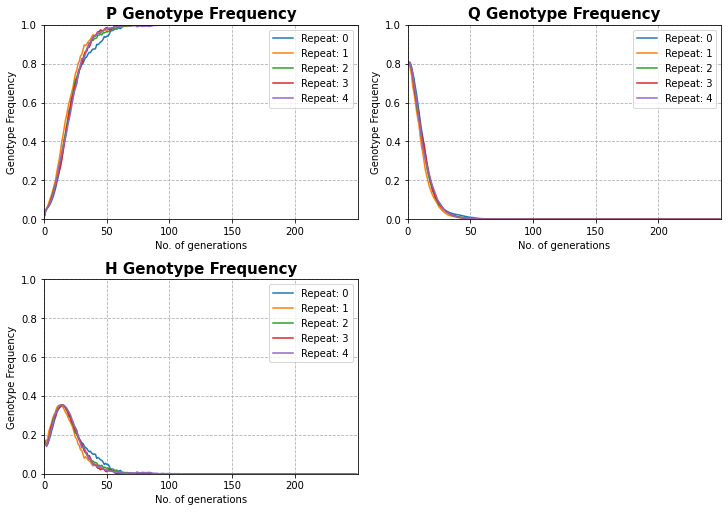

In [11]:
# Plotting multiple repeats

fig, ax = plt.subplots(2,2, figsize=(10,7), constrained_layout=True)
ax[1,1].remove()

repeats = range(5)

for repeat in repeats:
    df = rand_self_fertilization_simulation(
        A1_frequency          = 0.1,
        A2_dominance_degree   = 0.2,
        selection_coefficient = 0.2,
        self_fert_factor      = 0.5,
        population_size       = 500,
        no_of_generations     = 250)
    
    ax[0,0].plot(df['generation'], df['P'], label = f'Repeat: {repeat}')
    ax[0,1].plot(df['generation'], df['Q'], label = f'Repeat: {repeat}')
    ax[1,0].plot(df['generation'], df['H'], label = f'Repeat: {repeat}')

# P Plot
ax[0,0].set_title('P Genotype Frequency', fontdict = {'fontsize': 15, 'fontweight' : 600})
ax[0,0].set_xlabel('No. of generations',  fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[0,0].set_ylabel('Genotype Frequency',  fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[0,0].set_ylim([0,1.0])
ax[0,0].set_xlim([0,len(df['generation'])])
ax[0,0].grid(axis='y', linestyle= '--')
ax[0,0].grid(axis='x', linestyle= '--')
ax[0,0].set_xticks(df['generation'][::50])
ax[0,0].legend()

# Q Plot
ax[0,1].set_title('Q Genotype Frequency', fontdict = {'fontsize': 15, 'fontweight' : 600})
ax[0,1].set_xlabel('No. of generations',  fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[0,1].set_ylabel('Genotype Frequency',  fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[0,1].set_ylim([0,1.0])
ax[0,1].set_xlim([0,len(df['generation'])])
ax[0,1].grid(axis='y', linestyle= '--')
ax[0,1].grid(axis='x', linestyle= '--')
ax[0,1].set_xticks(df['generation'][::50])
ax[0,1].legend()

# H Plot
ax[1,0].set_title('H Genotype Frequency', fontdict = {'fontsize': 15, 'fontweight' : 600})
ax[1,0].set_xlabel('No. of generations',  fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[1,0].set_ylabel('Genotype Frequency',  fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[1,0].set_ylim([0,1.0])
ax[1,0].set_xlim([0,len(df['generation'])])
ax[1,0].grid(axis='y', linestyle= '--')
ax[1,0].grid(axis='x', linestyle= '--')
ax[1,0].set_xticks(df['generation'][::50])
ax[1,0].legend()